In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import math

In [76]:
age_df = pd.read_csv("C:\\Datasets\\UniversityMajors\\all-ages.csv")
grad_df =pd.read_csv("C:\\Datasets\\UniversityMajors\\grad-students.csv")
major_df =pd.read_csv("C:\\Datasets\\UniversityMajors\\majors-list.csv")
recent_df =pd.read_csv("C:\\Datasets\\UniversityMajors\\recent-grads.csv")
women_stem =pd.read_csv("C:\\Datasets\\UniversityMajors\\women-stem.csv")

In [77]:
uni_df = pd.read_csv("C:\\Datasets\\UniversityMajors\\combined_university.csv")

In [78]:
uni_df

,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,3609,ZOOLOGY,Biology & Life Science,8409,47,3050,5359,0.637293,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,5201,EDUCATIONAL PSYCHOLOGY,Psychology & Social Work,2854,7,522,2332,0.817099,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,5202,CLINICAL PSYCHOLOGY,Psychology & Social Work,2838,13,568,2270,0.799859,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,5203,COUNSELING PSYCHOLOGY,Psychology & Social Work,4626,21,931,3695,0.798746,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [79]:
uni_df.columns

Index(['Major_code', 'Major', 'Major_category', 'Total', 'Sample_size', 'Men',
       'Women', 'ShareWomen', 'Employed', 'Full_time', 'Part_time',
       'Full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median',
       'P25th', 'P75th', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs'],
      dtype='object')

In [80]:
uni_df.isnull().sum()

Major_code              0
Major                   0
Major_category          0
Total                   0
Sample_size             0
Men                     0
Women                   0
ShareWomen              0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       1
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [81]:
uni_df.columns

Index(['Major_code', 'Major', 'Major_category', 'Total', 'Sample_size', 'Men',
       'Women', 'ShareWomen', 'Employed', 'Full_time', 'Part_time',
       'Full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median',
       'P25th', 'P75th', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs'],
      dtype='object')

In [82]:
uni_df.head(30)

,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,2418,NUCLEAR ENGINEERING,Engineering,2573,17,2200,373,0.144967,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,6202,ACTUARIAL SCIENCE,Business,3777,51,832,960,0.535714,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,10,2110,1667,0.441356,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
8,2414,MECHANICAL ENGINEERING,Engineering,91227,1029,12953,2105,0.139793,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,2408,ELECTRICAL ENGINEERING,Engineering,81527,631,8407,6548,0.437847,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [99]:
# How many total majors
def total_of_each(column,df=uni_df):
    """Using nunique() method and value_counts()"""
    print(f"The total number of items in {column} is {uni_df[column].nunique()}items")
    print(f"The ten most frequently appearing in {column} is /n{ uni_df[column].value_counts().head(10)}")
    print(f"The 5 least frequently appearing in {column} is /n{ uni_df[column].value_counts().tail(5)}")


In [100]:
total_of_each('Major')
#It appears that the majors are uniquely identified with their being 173 majors

The total number of items in Major is 173items
The ten most frequently appearing in Major is /nPETROLEUM ENGINEERING                                            1
MATHEMATICS TEACHER EDUCATION                                    1
FORESTRY                                                         1
SOIL SCIENCE                                                     1
GENERAL EDUCATION                                                1
HISTORY                                                          1
FRENCH GERMAN LATIN AND OTHER COMMON FOREIGN LANGUAGE STUDIES    1
INTERCULTURAL AND INTERNATIONAL STUDIES                          1
SOCIAL SCIENCE OR HISTORY TEACHER EDUCATION                      1
COMMUNITY AND PUBLIC HEALTH                                      1
Name: Major, dtype: int64
The 5 least frequently appearing in Major is /nINTERNATIONAL BUSINESS                                 1
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    1
MOLECULAR BIOLOGY                               

In [102]:
#How many  Major categories
total_of_each('Major_category')
#A lot of students chose to pursue engineering,education and Humanities
#A few students chose Communication and Law and Public Policy

The total number of items in Major_category is 16items
The ten most frequently appearing in Major_category is /nEngineering                        29
Education                          16
Humanities & Liberal Arts          15
Biology & Life Science             14
Business                           13
Health                             12
Computers & Mathematics            11
Physical Sciences                  10
Agriculture & Natural Resources    10
Social Science                      9
Name: Major_category, dtype: int64
The 5 least frequently appearing in Major_category is /nArts                                   8
Industrial Arts & Consumer Services    7
Law & Public Policy                    5
Communications & Journalism            4
Interdisciplinary                      1
Name: Major_category, dtype: int64


In [ ]:
"""EXPLORATORY DATA ANALYSIS OR GENDER WARS,IN THIS PART I ANALYSE ,Men and Women Graduates""""

In [123]:
#What graduates more?
print(f"The total number of Male Graduates is {uni_df['Men'].sum()}")
print(f"The total number of Female Graduates is {uni_df['Women'].sum()}")
print(f"The ratio of Male Graduates to Women is 1: {uni_df['Men'].sum()/uni_df['Women'].sum()}")

#Women graduate more with a ration of 1:0.7 i.e 10 women to 7 men

The total number of Male Graduates is 2878263
The total number of Female Graduates is 3897752
The ratio of Male Graduates to Women is 1: 0.7384417992730169


In [124]:
#STEM GENDER WARS IN NUMBERS
"""ENGINEERING"""
male =uni_df[uni_df['Major_category']=='Engineering']['Men'].sum()
female =uni_df[uni_df['Major_category']=='Engineering']['Women'].sum()
print(f"The total number of Male studying engineering is is {uni_df[uni_df['Major_category']=='Engineering']['Men'].sum()}")
print(f"The total number of Female studying engineering is {uni_df[uni_df['Major_category']=='Engineering']['Women'].sum()}")
print(f"The ratio of Male Graduates to Women is 1: {male/female}")
#More female  do engineering as compared to males


The total number of Male studying engineering is is 400644
The total number of Female studying engineering is 118051
The ratio of Male Graduates to Women is 1: 3.3938213145166074


In [125]:
#MATHEMATICS AND COMPUTER SCIENCE
male =uni_df[uni_df['Major_category']=='Computers & Mathematics']['Men'].sum()
female =uni_df[uni_df['Major_category']=='Computers & Mathematics']['Women'].sum()
print(f"The total number of Male studying Computers & Mathematics is is {uni_df[uni_df['Major_category']=='Computers & Mathematics']['Men'].sum()}")
print(f"The total number of Female studying Computers & Mathematics is  {uni_df[uni_df['Major_category']=='Computers & Mathematics']['Women'].sum()}")
print(f"The ratio of Male Graduates to Women is 1: {male/female}")
#The ratio is Evenly matched

The total number of Male studying Computers & Mathematics is is 59623
The total number of Female studying Computers & Mathematics is  62599
The ratio of Male Graduates to Women is 1: 0.9524593044617327


In [128]:
 #Biology and Life Science
male =uni_df[uni_df['Major_category']=='Biology & Life Science']['Men'].sum()
female =uni_df[uni_df['Major_category']=='Biology & Life Science']['Women'].sum()
print(f"The total number of Male studying Biology & LifeScience is  {uni_df[uni_df['Major_category']=='Biology & Life Science']['Men'].sum()}")
print(f"The total number of Female studying Biology & LifeScience is {uni_df[uni_df['Major_category']=='Biology & Life Science']['Women'].sum()}")
print(f"The ratio of Male Graduates to Women is 1: {male/female}")
#The ratio is Evenly matched


The total number of Male studying Biology & LifeScience is  427803
The total number of Female studying Biology & LifeScience is 578132
The ratio of Male Graduates to Women is 1: 0.7399746078750181


In [135]:
# Law
male =uni_df[uni_df['Major_category']=='Biology & Life Science']['Men'].sum()
female =uni_df[uni_df['Major_category']=='Biology & Life Science']['Women'].sum()
print(f"The total number of Male studying Biology & LifeScience is  {uni_df[uni_df['Major_category']=='Biology & Life Science']['Men'].sum()}")
print(f"The total number of Female studying Biology & LifeScience is {uni_df[uni_df['Major_category']=='Biology & Life Science']['Women'].sum()}")
print(f"The ratio of Male Graduates to Women is 1: {male/female}")

The total number of Male studying Biology & LifeScience is  427803
The total number of Female studying Biology & LifeScience is 578132
The ratio of Male Graduates to Women is 1: 0.7399746078750181


In [155]:
"""Now A function that does the analysis for us"""

def gender_analysis(major_category,subject,gender1='Men',gender2='Women',df=uni_df):
    """This function returns the total number of men and women in a particular field of study and their ratio
    Args: 
    Major category(str): This is the field that we intend to study for example computer science
    Subject(str) :For every category example Sciences ,there is Biology or Agriculture
    Gender : This is the gender we intend to study ,Men and Women
    
    Returns:
    Total number of males and females studying a particular subject and females ,the ratio of the genders
    """
    male =uni_df[uni_df[major_category]==subject][gender1].sum()
    female =uni_df[uni_df[major_category]==subject][gender2].sum()
    print(f"The total number of Male studying {subject} is  {uni_df[uni_df[major_category]==subject][gender1].sum()}")
    print(f"The total number of Female studying {subject} is {uni_df[uni_df[major_category]==subject][gender2].sum()}")
    print(f"The ratio of Male Graduates to Women in {subject} is 1: {np.round(male/female)}")


In [156]:
gender_analysis('Major_category','Biology & Life Science')

The total number of Male studying Biology & Life Science is  427803
The total number of Female studying Biology & Life Science is 578132
The ratio of Male Graduates to Women in Biology & Life Science is 1: 1.0


In [157]:
gender_analysis('Major_category','Law & Public Policy')

The total number of Male studying Law & Public Policy is  10484
The total number of Female studying Law & Public Policy is 5478
The ratio of Male Graduates to Women in Law & Public Policy is 1: 2.0


In [158]:
# FOR OTHER COLUMNS
gender_analysis('Major','ACTUARIAL SCIENCE')

The total number of Male studying ACTUARIAL SCIENCE is  832
The total number of Female studying ACTUARIAL SCIENCE is 960
The ratio of Male Graduates to Women in ACTUARIAL SCIENCE is 1: 1.0


In [159]:
gender_analysis('Major','HUMAN RESOURCES AND PERSONNEL MANAGEMENT')

The total number of Male studying HUMAN RESOURCES AND PERSONNEL MANAGEMENT is  4435
The total number of Female studying HUMAN RESOURCES AND PERSONNEL MANAGEMENT is 9093
The ratio of Male Graduates to Women in HUMAN RESOURCES AND PERSONNEL MANAGEMENT is 1: 0.0


In [160]:
gender_analysis('Major','COMMUNITY AND PUBLIC HEALTH') 

The total number of Male studying COMMUNITY AND PUBLIC HEALTH is  8575
The total number of Female studying COMMUNITY AND PUBLIC HEALTH is 16075
The ratio of Male Graduates to Women in COMMUNITY AND PUBLIC HEALTH is 1: 1.0


In [162]:
uni_df.head()

,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [187]:
by_major=uni_df.groupby('Major_category')
by_major.Unemployed.sum().sort_values().tail(10)

Major_category
Health                         22213
Biology & Life Science         22854
Education                      24969
Communications & Journalism    26852
Arts                           28228
Engineering                    29817
Psychology & Social Work       33292
Social Science                 42975
Humanities & Liberal Arts      51101
Business                       79877
Name: Unemployed, dtype: int64

In [188]:
by_major.Employed.sum().sort_values().tail(10)

Major_category
Arts                            288114
Biology & Life Science          302797
Communications & Journalism     330660
Health                          372147
Psychology & Social Work        380344
Social Science                  401493
Engineering                     420372
Education                       479839
Humanities & Liberal Arts       544118
Business                       1088742
Name: Employed, dtype: int64

In [189]:
by_major.Full_time.sum().sort_values(ascending=True).tail(10)

Major_category
Arts                           207773
Biology & Life Science         240377
Communications & Journalism    273330
Psychology & Social Work       289000
Health                         294819
Social Science                 347141
Engineering                    381867
Education                      398059
Humanities & Liberal Arts      416939
Business                       988870
Name: Full_time, dtype: int64

In [195]:
by_major=uni_df.groupby('Major_category')['Men']
by_major.sum()

Major_category
Agriculture & Natural Resources        197875
Arts                                    86781
Biology & Life Science                 427803
Business                               176917
Communications & Journalism             36692
Computers & Mathematics                 59623
Education                              257712
Engineering                            400644
Health                                  94630
Humanities & Liberal Arts              159945
Industrial Arts & Consumer Services     35043
Interdisciplinary                       10031
Law & Public Policy                     10484
Physical Sciences                      184879
Psychology & Social Work               235847
Social Science                         503357
Name: Men, dtype: int64

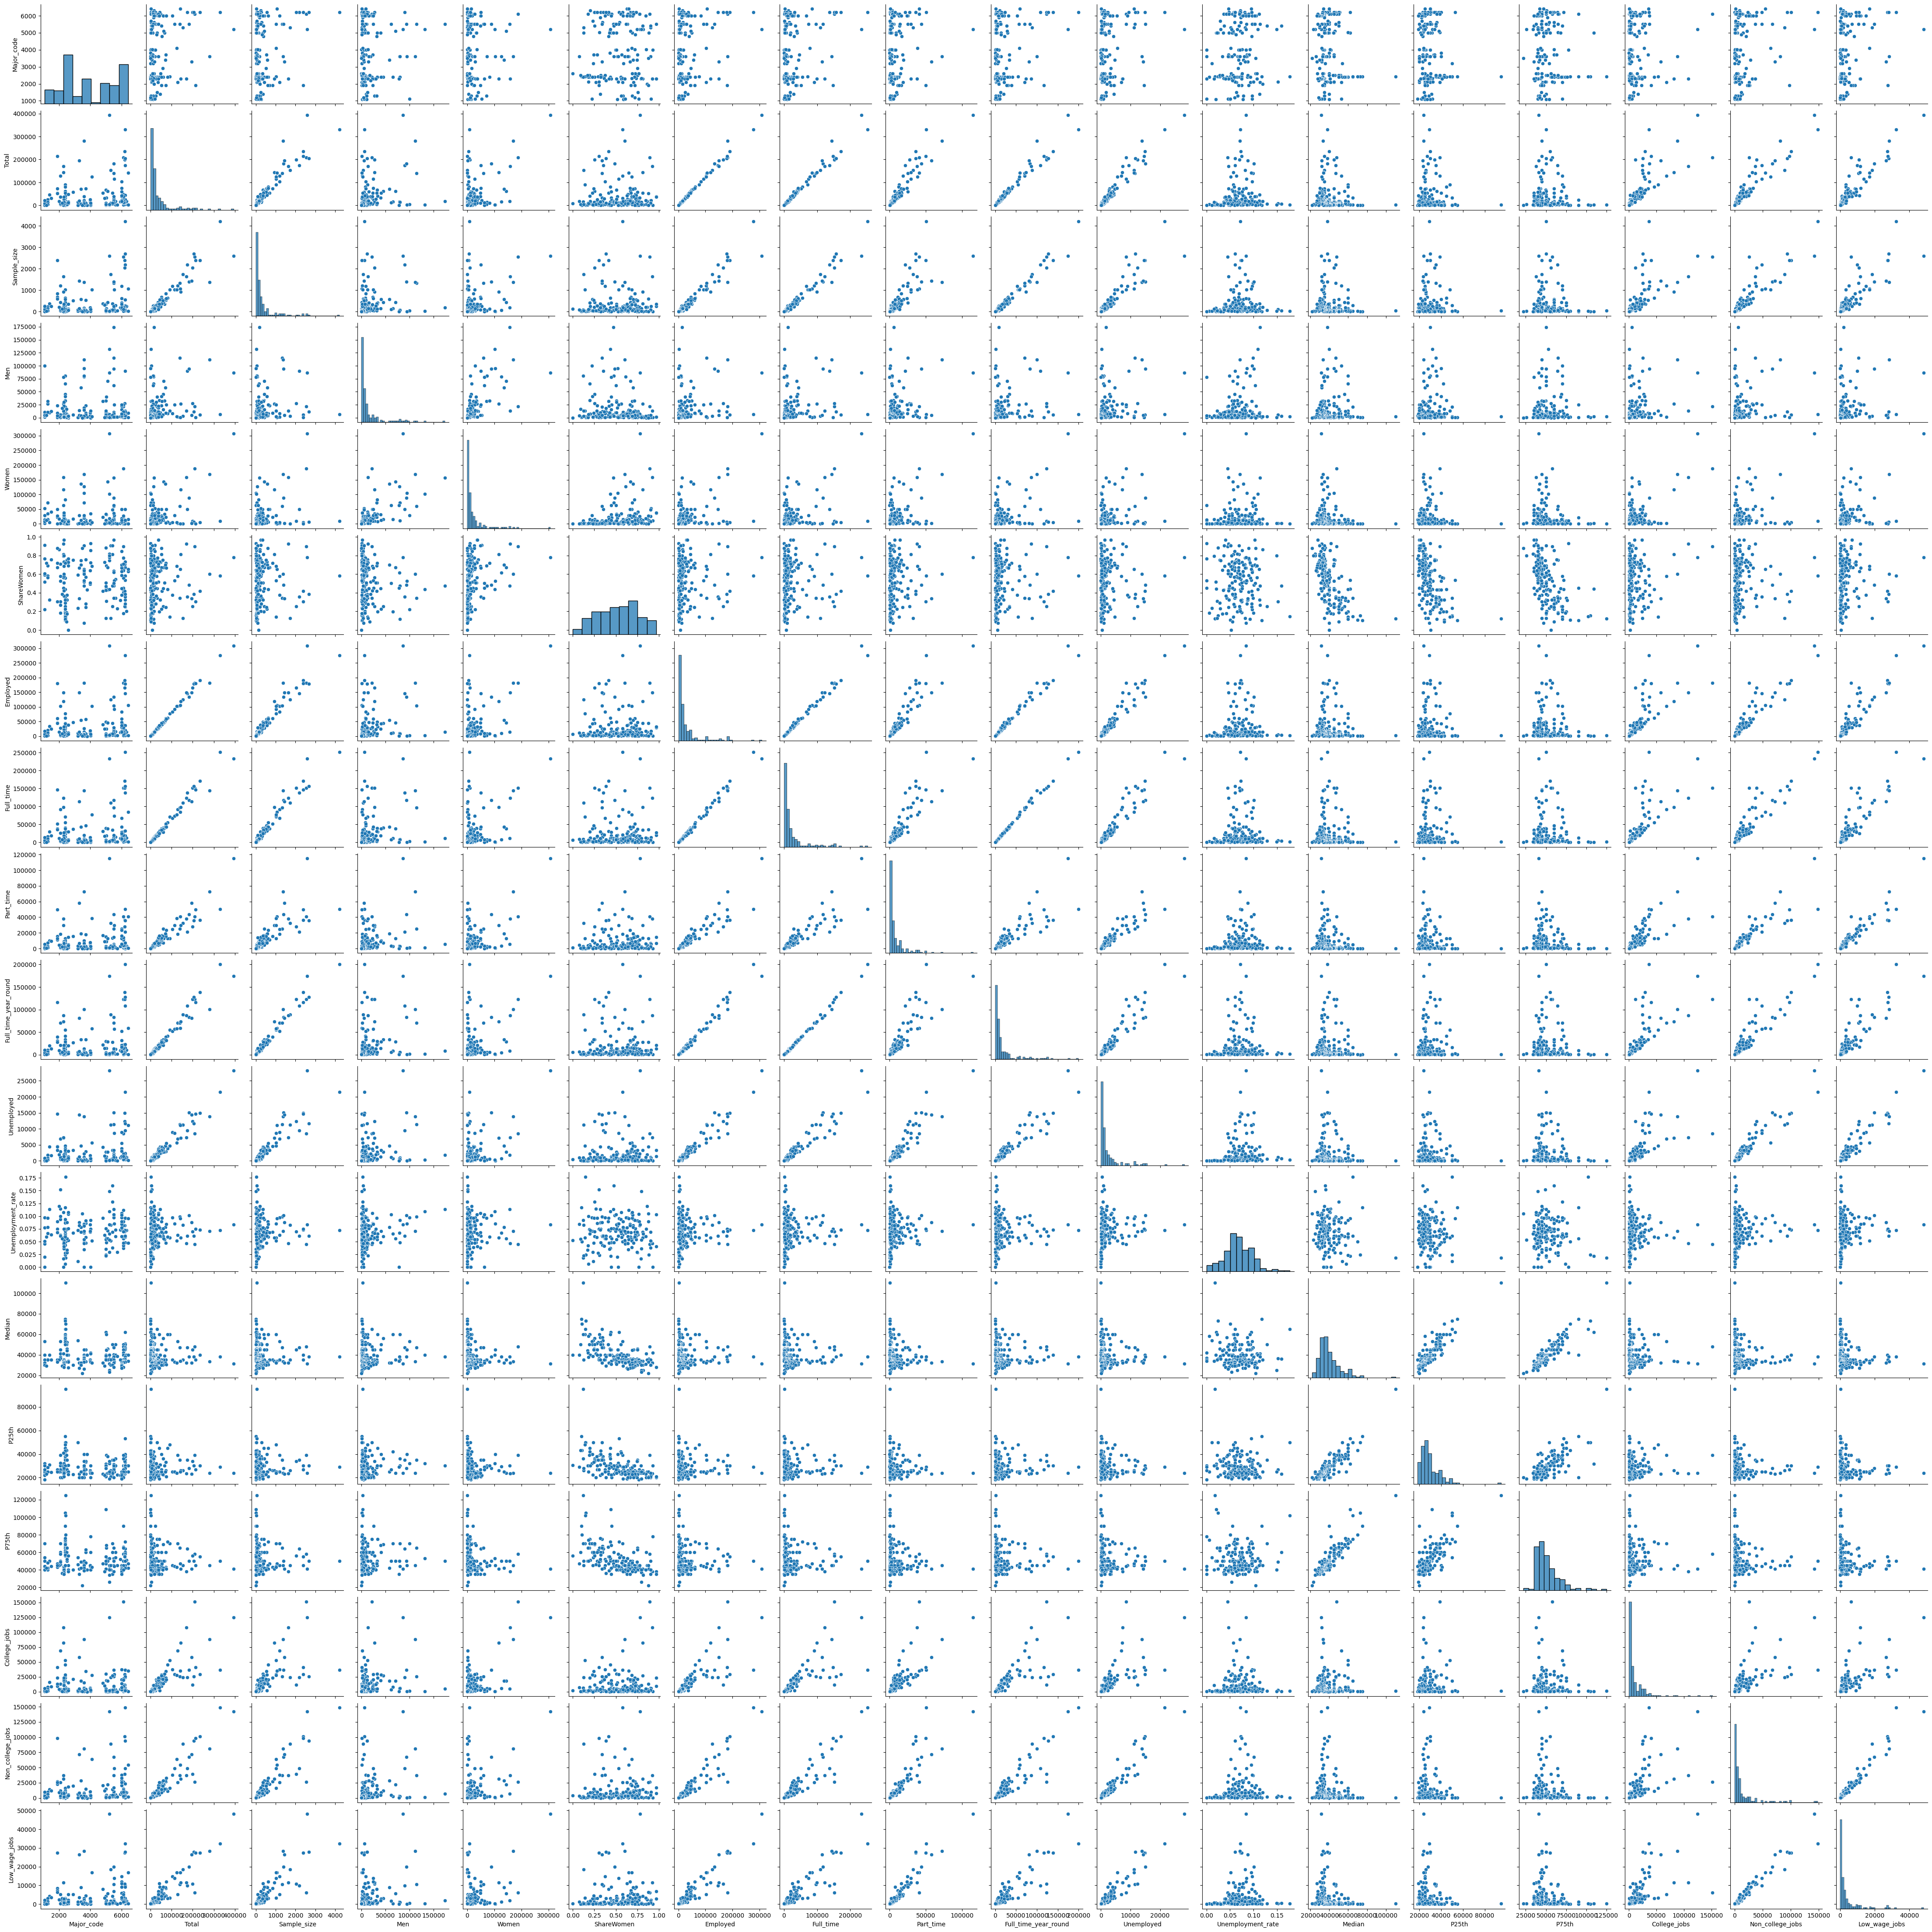

In [196]:
sns.pairplot(uni_df)

Text(0.5, 1.0, 'Total Unemployed Graduates')

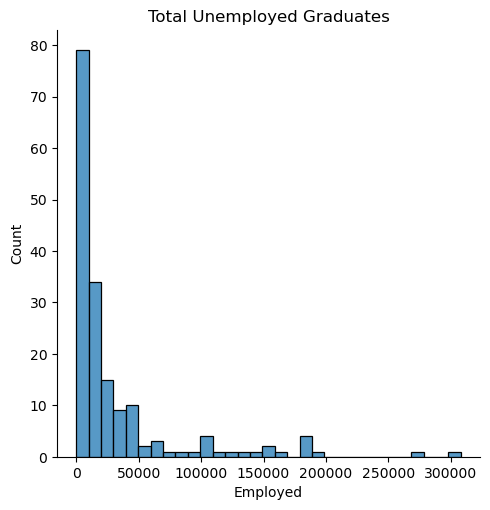

In [200]:
sns.displot(x=uni_df['Employed'])
plt.title('Total Unemployed Graduates')

Text(0.5, 1.0, 'Total Unemployed Graduates')

<Figure size 1500x1000 with 0 Axes>

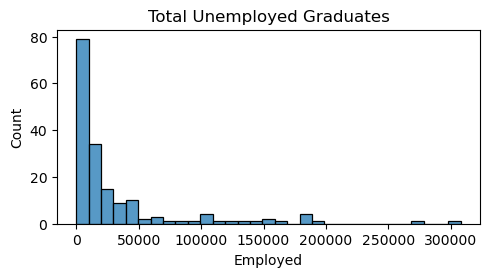

In [227]:
fig = plt.figure(figsize=(15,10))
sns.displot(x=uni_df['Employed'])
plt.title('Total employed Graduates')
plt.subplot(2,1,2)
sns.histplot(uni_df['Employed'])
plt.title('Total Unemployed Graduates')

In [225]:
uni_df.columns

Index(['Major_code', 'Major', 'Major_category', 'Total', 'Sample_size', 'Men',
       'Women', 'ShareWomen', 'Employed', 'Full_time', 'Part_time',
       'Full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median',
       'P25th', 'P75th', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs'],
      dtype='object')

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Women', ylabel='Unemployed'>

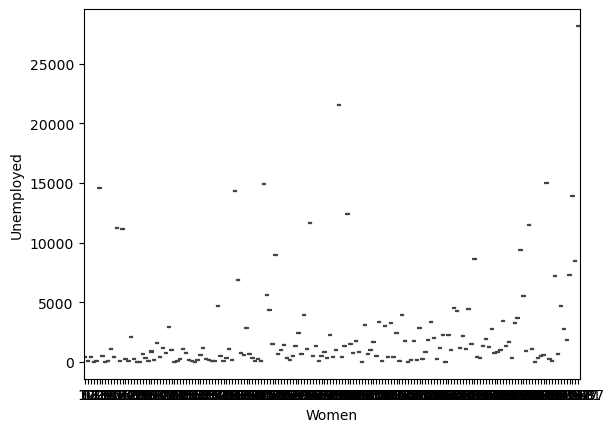

In [219]:
sns.boxplot(uni_df['Women'],uni_df['Unemployed'])

Text(0.5, 1.0, 'A heatmap for our University Dataset')

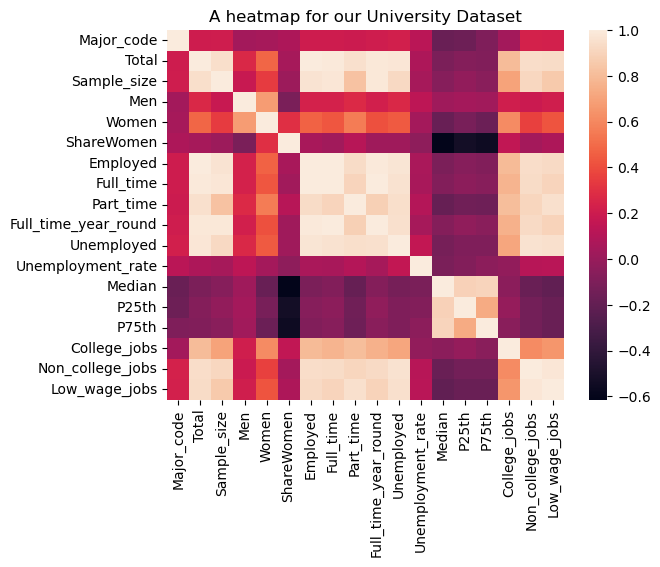

In [223]:
correlation= uni_df.corr()
correlation
sns.heatmap(correlation)
plt.title('A heatmap for our University Dataset')

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='College_jobs'>

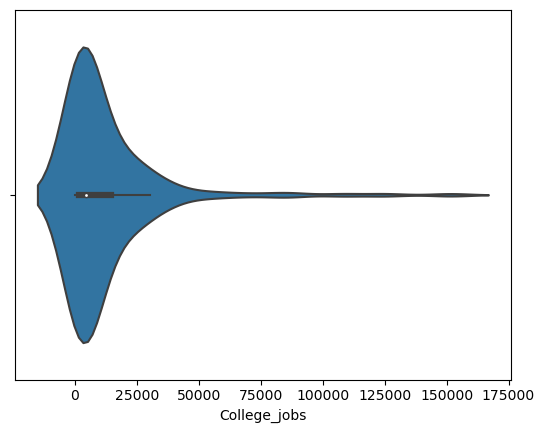

In [230]:
sns.violinplot(uni_df['College_jobs'])

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Unemployment Rate by Major Categories')

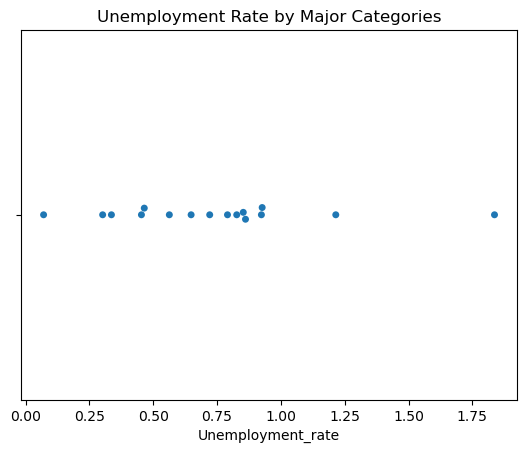

In [261]:
by_category=uni_df.groupby('Major_category')
by_category.Unemployment_rate.sum().sort_values(ascending=True)
sns.swarmplot(by_category.Unemployment_rate.sum().sort_values(ascending=True))
plt.title('Unemployment Rate by Major Categories')

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The number of graduates employed')

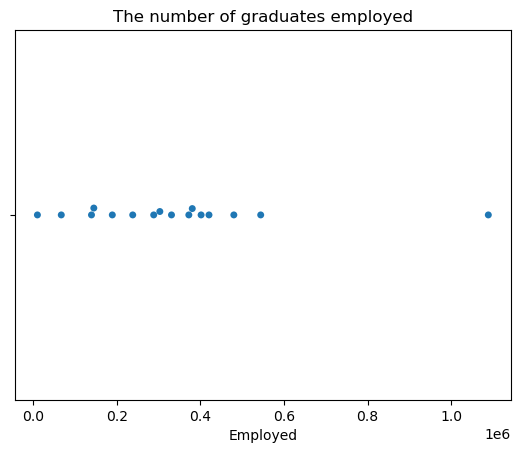

In [259]:
sns.swarmplot(by_category.Employed.sum().sort_values(ascending=True))
plt.title('The number of graduates employed')

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'A violin plot showing various rates of unemployment sorted by Major Category')

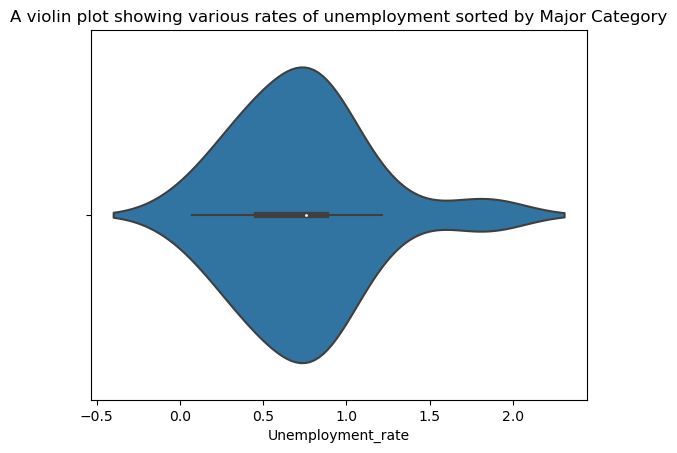

In [242]:
sns.violinplot(by_category.Unemployment_rate.sum().sort_values(ascending=True))
plt.title('A violin plot showing various rates of unemployment sorted by Major Category')

In [249]:
# For the women in stem
women_stem

,index,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000
...,...,...,...,...,...,...,...,...,...,...
71,71,72,3604,ECOLOGY,Biology & Life Science,9154,3878,5276,0.576360,33000
72,72,73,6109,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,0.721866,33000
73,73,74,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,0.774577,32400
74,74,75,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,0.967998,28000


In [250]:
gender_analysis('Major_category','Engineering',df=women_stem)

The total number of Male studying Engineering is  400644
The total number of Female studying Engineering is 118051
The ratio of Male Graduates to Women in Engineering is 1: 3.0


In [251]:
total_of_each('Major_category',df=women_stem)

The total number of items in Major_category is 16items
The ten most frequently appearing in Major_category is /nEngineering                        29
Education                          16
Humanities & Liberal Arts          15
Biology & Life Science             14
Business                           13
Health                             12
Computers & Mathematics            11
Physical Sciences                  10
Agriculture & Natural Resources    10
Social Science                      9
Name: Major_category, dtype: int64
The 5 least frequently appearing in Major_category is /nArts                                   8
Industrial Arts & Consumer Services    7
Law & Public Policy                    5
Communications & Journalism            4
Interdisciplinary                      1
Name: Major_category, dtype: int64


In [252]:
gender_analysis('Major_category','Health',df=women_stem)

The total number of Male studying Health is  94630
The total number of Female studying Health is 312026
The ratio of Male Graduates to Women in Health is 1: 0.0


Text(0.5, 1.0, 'A clustermap for our women stem dataframe')

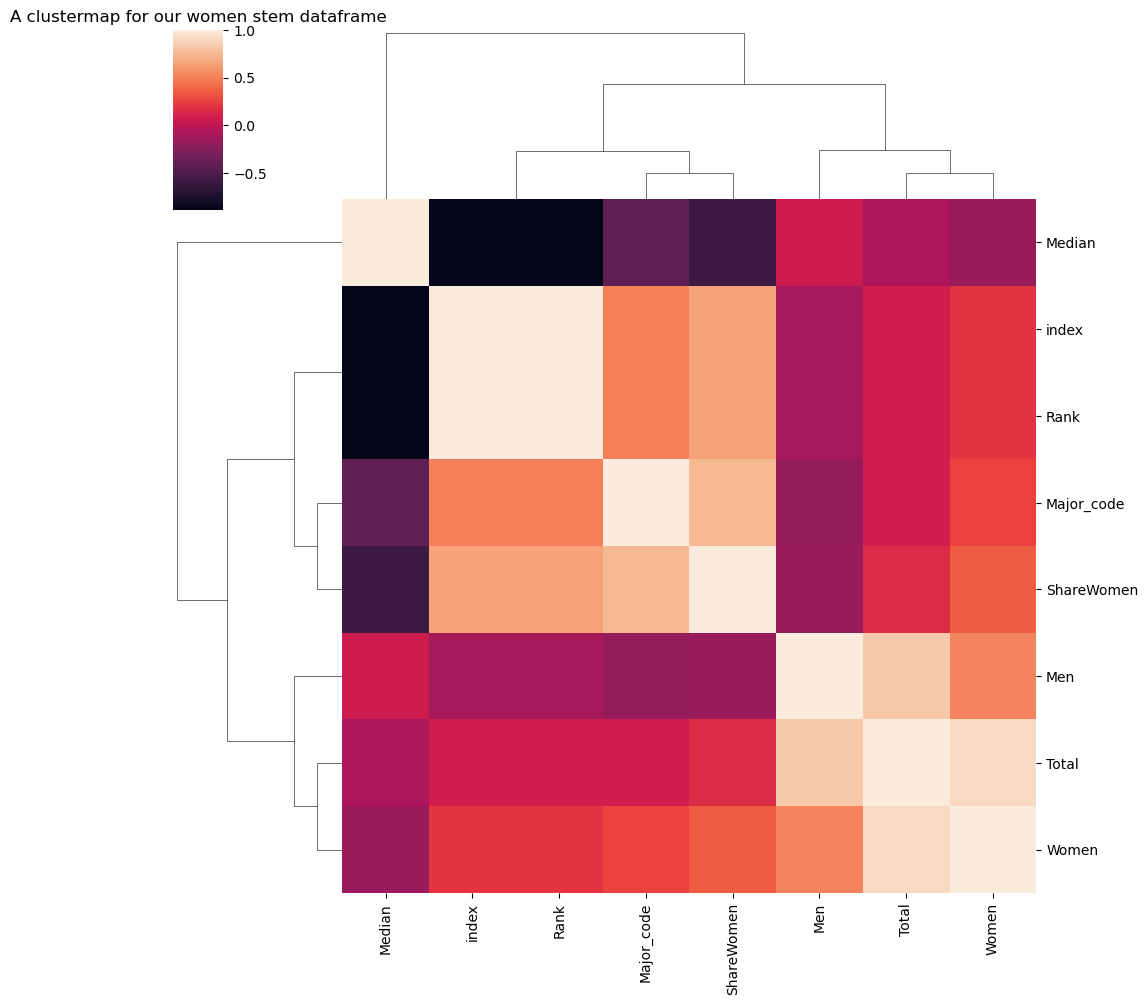

In [256]:
sns.clustermap(women_stem.corr())
plt.title('A clustermap for our women stem dataframe')